In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt

### Model 1

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# x_train é composto por 60000 matrizes de 28 * 28
x_train.shape
# os dados devem ser reorgazinados para 2D 28 * 28 = 784 1D array por 60000obs

(60000, 28, 28)

In [4]:
# Reshape dos dados para 2D
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [5]:
x_train.shape

(60000, 784)

In [6]:
# normalize the dataset
x_train = x_train / 255
x_test = x_test / 255

In [7]:
# one hot encode the categorical label
from tensorflow.keras import utils

In [8]:
# One hot encode with utils.to_categorical
y_train = utils.to_categorical(y_train, 10) # 10 is the number of classes
y_test = utils.to_categorical(y_test, 10)

### construção da rede neural



In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [10]:
model = Sequential()
model.add(Dense(10, input_shape = (784,))) # 10 classes of input 784
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.optimizers import SGD

In [13]:
# compilação do modelo: perda categ_cross para classificação, SGD = otimização com Gradiente Descent
model.compile(loss="categorical_crossentropy", optimizer = SGD(), metrics=["accuracy", "AUC"])

In [14]:
model_v1 = model.fit(x_train, y_train, batch_size=512, epochs = 50, validation_split= 0.2)

Epoch 1/50
94/94 [==============================] - 2s 19ms/step - loss: 2.0194 - accuracy: 0.3662 - auc: 0.7621 - val_loss: 1.6516 - val_accuracy: 0.6384 - val_auc: 0.9237
Epoch 2/50
94/94 [==============================] - 1s 14ms/step - loss: 1.4569 - accuracy: 0.6959 - auc: 0.9452 - val_loss: 1.2552 - val_accuracy: 0.7628 - val_auc: 0.9637
Epoch 3/50
94/94 [==============================] - 1s 14ms/step - loss: 1.1674 - accuracy: 0.7688 - auc: 0.9660 - val_loss: 1.0376 - val_accuracy: 0.8043 - val_auc: 0.9737
Epoch 4/50
94/94 [==============================] - 1s 14ms/step - loss: 0.9999 - accuracy: 0.7979 - auc: 0.9732 - val_loss: 0.9038 - val_accuracy: 0.8242 - val_auc: 0.9783
Epoch 5/50
94/94 [==============================] - 1s 14ms/step - loss: 0.8919 - accuracy: 0.8149 - auc: 0.9769 - val_loss: 0.8137 - val_accuracy: 0.8349 - val_auc: 0.9809
Epoch 6/50
94/94 [==============================] - 1s 15ms/step - loss: 0.8164 - accuracy: 0.8260 - auc: 0.9792 - val_loss: 0.7489 - v

94/94 [==============================] - 1s 13ms/step - loss: 0.4100 - accuracy: 0.8900 - auc: 0.9900 - val_loss: 0.3827 - val_accuracy: 0.8995 - val_auc: 0.9909
Epoch 49/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4081 - accuracy: 0.8903 - auc: 0.9900 - val_loss: 0.3811 - val_accuracy: 0.8994 - val_auc: 0.9909
Epoch 50/50
94/94 [==============================] - 1s 13ms/step - loss: 0.4064 - accuracy: 0.8907 - auc: 0.9900 - val_loss: 0.3796 - val_accuracy: 0.8997 - val_auc: 0.9910


In [15]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[ 0.02506088,  0.02634597, -0.04620939, ...,  0.01387101,
          0.07352791, -0.00919262],
        [-0.03074459, -0.01896317,  0.06044398, ..., -0.0831952 ,
          0.07381774,  0.05795602],
        [-0.02060129,  0.0400378 , -0.02057829, ...,  0.07854839,
         -0.007622  , -0.00874066],
        ...,
        [-0.04922417, -0.01076341,  0.03166841, ..., -0.06172864,
          0.04649072,  0.01140527],
        [-0.01469251,  0.00882194,  0.04814356, ...,  0.02736749,
          0.03120953,  0.01468633],
        [-0.00679186,  0.04637954, -0.07592913, ...,  0.07760201,
         -0.04970075,  0.01249266]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=
 array([-0.11682054,  0.19585092, -0.0339179 , -0.07562049,  0.06690545,
         0.23689103, -0.008663  ,  0.14042073, -0.3417801 , -0.06326532],
       dtype=float32)>]

In [16]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 965us/step - loss: 0.3809 - accuracy: 0.8983 - auc: 0.9909


[0.38088440895080566, 0.8982999920845032, 0.9909396171569824]

### Modelo 2 - adicionando camadas

In [19]:
model = Sequential()
model.add(Dense(128, input_shape = (784,))) # 128 neurons in
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(10)) # output classes = 10
model.add(Activation("softmax")) # probs of each class
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
________________________________________________

In [20]:
model.compile(optimizer= SGD(), loss = "categorical_crossentropy", metrics= ["accuracy", "AUC"])
model_v2 = model.fit(x_train, y_train, batch_size= 128, epochs=50, verbose=1, validation_split= 0.2)

Epoch 1/50
375/375 [==============================] - 1s 4ms/step - loss: 1.4800 - accuracy: 0.6290 - auc: 0.9124 - val_loss: 0.7408 - val_accuracy: 0.8412 - val_auc: 0.9819
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5877 - accuracy: 0.8569 - auc: 0.9846 - val_loss: 0.4494 - val_accuracy: 0.8852 - val_auc: 0.9894
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8835 - auc: 0.9891 - val_loss: 0.3714 - val_accuracy: 0.9002 - val_auc: 0.9912
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3754 - accuracy: 0.8955 - auc: 0.9907 - val_loss: 0.3337 - val_accuracy: 0.9072 - val_auc: 0.9923
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.9037 - auc: 0.9917 - val_loss: 0.3106 - val_accuracy: 0.9118 - val_auc: 0.9929
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3191 - accuracy: 0.9087 - auc: 0.9924 - val_loss: 0.29

Epoch 48/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9712 - auc: 0.9987 - val_loss: 0.1291 - val_accuracy: 0.9631 - val_auc: 0.9979
Epoch 49/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1020 - accuracy: 0.9712 - auc: 0.9987 - val_loss: 0.1273 - val_accuracy: 0.9638 - val_auc: 0.9978
Epoch 50/50
375/375 [==============================] - 1s 3ms/step - loss: 0.1003 - accuracy: 0.9722 - auc: 0.9987 - val_loss: 0.1271 - val_accuracy: 0.9631 - val_auc: 0.9979


In [21]:
model.weights

[<tf.Variable 'dense_7/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.07316081, -0.04890074, -0.03520124, ...,  0.00067518,
          0.07850253, -0.06002444],
        [-0.05552708,  0.04555397, -0.04591947, ..., -0.06983137,
          0.03746219,  0.02436214],
        [ 0.01640151, -0.01616529, -0.03441625, ...,  0.07971545,
          0.00738937, -0.05002683],
        ...,
        [-0.00431834,  0.06665825, -0.0016769 , ..., -0.01484907,
         -0.07959327, -0.0474051 ],
        [-0.06805256, -0.04622154, -0.06768208, ...,  0.00603277,
         -0.05188502,  0.02472471],
        [-0.04472229,  0.01807545, -0.02652666, ...,  0.05592141,
         -0.0258123 ,  0.01290742]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(128,) dtype=float32, numpy=
 array([-2.7514495e-02,  3.0091785e-02,  2.6303567e-03,  8.8499114e-02,
         2.8758727e-02, -8.5286862e-05, -1.4971614e-02,  3.4519741e-03,
         5.3557135e-02, -1.8616188e-02,  2.3080720e-02,  6.4982891e-02,
   

In [22]:
model.evaluate(x= x_test, y= y_test, )

313/313 [==============================] - 0s 1ms/step - loss: 0.1181 - accuracy: 0.9657 - auc: 0.9984


[0.11813680082559586, 0.9656999707221985, 0.9983786940574646]

In [34]:
from tensorflow.keras.layers import Dropout

In [35]:
model = Sequential()
model.add(Dense(128, input_shape = (784,)))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_17 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

In [36]:
model.compile(optimizer=SGD(), loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
modelo_3 = model.fit(x= x_train, y= y_train, batch_size= 128, epochs=50, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.8088 - accuracy: 0.7490 - val_loss: 0.4752 - val_accuracy: 0.8815
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.8046 - val_loss: 0.3919 - val_accuracy: 0.8943
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5622 - accuracy: 0.8289 - val_loss: 0.3498 - val_accuracy: 0.9053
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.5059 - accuracy: 0.8484 - val_loss: 0.3200 - val_accuracy: 0.9108
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4649 - accuracy: 0.8624 - val_loss: 0.2982 - val_accuracy: 0.9143
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.8700 - val_loss: 0.2807 - val_accuracy: 0.9200
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8760 - val_loss: 0.2665 - val_accuracy: 0.9227
Epoch 

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 956us/step - loss: 0.0747 - accuracy: 0.9780


[0.07471483945846558, 0.9779999852180481]

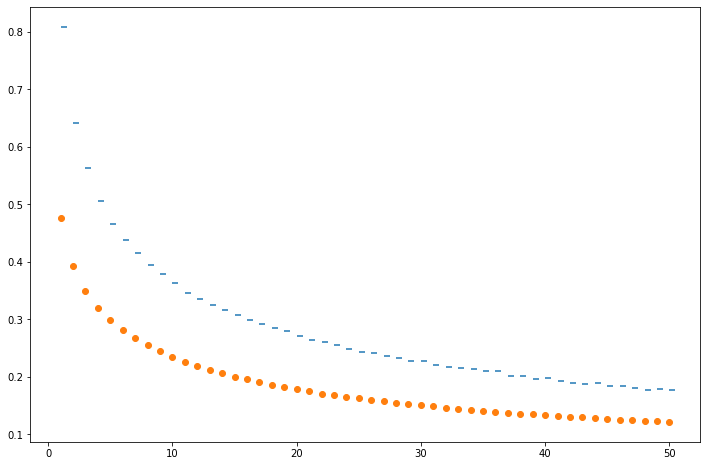

In [68]:
# Modelo 1 Error
plt.figure(figsize=(12,8))
plt.scatter(x= range(1,51) ,y= modelo_3.history["loss"],marker=True)
plt.scatter(x= range(1,51), y= modelo_3.history["val_loss"])
plt.show()

In [55]:
model_v1.history["loss"]

[2.0193915367126465,
 1.4568727016448975,
 1.1674152612686157,
 0.9998723268508911,
 0.8919256925582886,
 0.8164277076721191,
 0.7605699300765991,
 0.7172827124595642,
 0.6826587915420532,
 0.6542225480079651,
 0.6304161548614502,
 0.6101490259170532,
 0.592608630657196,
 0.5772612690925598,
 0.5637376308441162,
 0.5516668558120728,
 0.540818452835083,
 0.5310080051422119,
 0.5220937728881836,
 0.5139414072036743,
 0.5064440965652466,
 0.4995291829109192,
 0.49313172698020935,
 0.48716768622398376,
 0.48161792755126953,
 0.4764083921909332,
 0.47152698040008545,
 0.4669506847858429,
 0.46263033151626587,
 0.45854488015174866,
 0.45468732714653015,
 0.45100778341293335,
 0.44752880930900574,
 0.4442070424556732,
 0.4410351514816284,
 0.43800458312034607,
 0.43513545393943787,
 0.43236956000328064,
 0.4297254979610443,
 0.427183598279953,
 0.42474445700645447,
 0.42239344120025635,
 0.42013970017433167,
 0.4179571866989136,
 0.4158463180065155,
 0.41382503509521484,
 0.4118662178516388,


### Outros Otimizadores 

In [45]:
from tensorflow.keras.optimizers import RMSprop

In [40]:
model = Sequential()
model.add(Dense(128, input_shape = (784,)))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.3))
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_19 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_20 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

In [48]:
model.compile(optimizer= RMSprop(), loss="categorical_crossentropy", metrics=["accuracy"])

In [49]:
model_v4 = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4760 - accuracy: 0.8558 - val_loss: 0.1749 - val_accuracy: 0.9477
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2230 - accuracy: 0.9326 - val_loss: 0.1346 - val_accuracy: 0.9607
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1709 - accuracy: 0.9500 - val_loss: 0.1161 - val_accuracy: 0.9657
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1418 - accuracy: 0.9580 - val_loss: 0.1049 - val_accuracy: 0.9695
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9607 - val_loss: 0.0959 - val_accuracy: 0.9724
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1168 - accuracy: 0.9641 - val_loss: 0.0986 - val_accuracy: 0.9712
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9689 - val_loss: 0.0975 - val_accuracy: 0.9732
Epoch 

In [50]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 768us/step - loss: 0.1342 - accuracy: 0.9773


[0.1342315971851349, 0.9772999882698059]